In [1]:
import json
import pandas as pd
import numpy as np

data_pd = pd.read_csv(r'C:\Users\Fernando\ProcesadoMasivoDatos\Proyecto\suj-5\StreamingHistory_suj5.csv', encoding="utf8")

In [2]:
track_name = data_pd.trackName.unique()
len(track_name)

2041

In [3]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0         Kaydy Cain            582
1               ABBA            155
2      Justin Quiles            144
3       Daddy Yankee            105
4  La Mafia del Amor             79
5             Yandel             64
6          Bad Bunny             64
7           Anuel AA             62
8     Rauw Alejandro             57
9              Ozuna             48

<AxesSubplot:ylabel='Artist'>

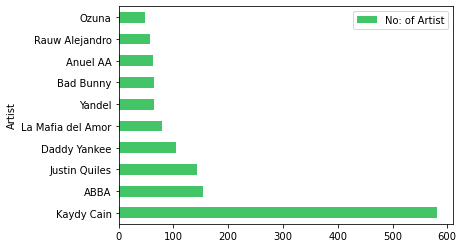

In [4]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')


In [5]:
df1_list = df1['Artist'].head(10).tolist()


In [6]:
print(df1_list)

['Kaydy Cain', 'ABBA', 'Justin Quiles', 'Daddy Yankee', 'La Mafia del Amor', 'Yandel', 'Bad Bunny', 'Anuel AA', 'Rauw Alejandro', 'Ozuna']


In [7]:
a =np.array(df1_list).astype(str)

In [8]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['PORFA', 'SI ELLA SALE', 'MÁS DE UNA CITA', 'BYE ME FUI', 'CANCIÓN CON YANDEL', "PA' ROMPERLA", 'BAD CON NICKY', 'BENDICIONES', 'CÓMO SE SIENTE - Remix', 'RONCA FREESTYLE', 'EN CASITA', 'A las Nueve', 'A Las Nueve', 'A las Nueve', 'Tan Lejos', 'Ese Maldito Momento', 'De Nada Sirve', 'Chau', 'Verte Reír', 'No Necesito Nada', 'Dinamita', 'De Momento Abril', 'Los Jardines De Marzo', '¿Qué?', 'De Momento Abril', 'Dinamita', 'A las Nueve', 'A las Nueve', 'A las Nueve', 'A las Nueve', 'A las Nueve', 'A las Nueve', 'Lay All Your Love On Me', 'The Winner Takes It All', 'Super Trouper', 'Happy New Year', 'The Way Old Friends Do - Live At Wembley Arena, London, England / 1979', 'Super Trouper', 'Tototo', 'Rockstar', 'Peace Of Mind', 'Lady Comando', 'Back In The Days', 'Jacuzzi', '6 Pecados', 'Como los Maestros', 'Si Me Muero', 'HDP', 'Amor Bandido', 'Eso Se Baila Así', 'PA TU CASA (feat. Kaydy Cain) - Remix', 'Matarnos', 'Maldades (El Combo Perfecto Remix)', 'La Familia', 'Díselo', 'No Me Ames'

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'

scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [10]:
id_list=[]
for i in track_list:

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['4J2HLNTxiVxxs6kWgTIN43', '1zaDh3qaGSeSmulNyWlUxm', '4EJHKSnHENfjOxXWryyNtL', '0FktnzDqjClqU6iqOZVEs2', '3pm4XtcsRIFFtH2UErk62R', '5XqCz18k96K8tx6DAYM97i', '5bmSver2b3ZXyuyLKtgnFI', '2CoMYp2uIKsT09nreEZnZn', '2tFwfmceQa1Y6nRPhYbEtC', '3XZeOzJ9tqnu58YP6cqApI', '2DhNdoHxavs7Qtf5MnhZD0', '68cko9zdsKwaxgb98sF36S', '68cko9zdsKwaxgb98sF36S', '68cko9zdsKwaxgb98sF36S', '2T2ndujObq4FfXpfvZHyTH', '6MuJUSYCqA4FpMogUHzb2R', '2CFDPiNUxcSOqfQtUHYNxF', '1ezKshOBhoBczy61HfiXVQ', '6StWP4Tvs8Ci6QOCIDefYk', '5A44iIZenvd56WXWCO9K5K', '4Fe8UM8MCSQa7vE73RPjSG', '1kjJLQhV2NDCWCf0ParWAJ', '0EFLJzBpwB2K0ys1AGTUhw', '6uzGmmQ4CuG9HvZktEy0LF', '1kjJLQhV2NDCWCf0ParWAJ', '4Fe8UM8MCSQa7vE73RPjSG', '68cko9zdsKwaxgb98sF36S', '68cko9zdsKwaxgb98sF36S', '68cko9zdsKwaxgb98sF36S', '68cko9zdsKwaxgb98sF36S', '68cko9zdsKwaxgb98sF36S', '68cko9zdsKwaxgb98sF36S', '74wySERHHxB8Ul9A0CNBla', '3oEkrIfXfSh9zGnE7eBzSV', '4QwTjvdc3LoFJL5cETDelS', '4AsvGVDWs16fqIiIdDzyvX', '5Kq6zleJTirgokGAL7IJQc', '4QwTjvdc3LoFJL5cETDelS', '39OeD4vR1U

In [11]:
id_list = [x for x in id_list if x is not None]

In [12]:
print(len(id_list))

5067


In [13]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [14]:
import time

In [15]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|██████████████████████████████████████████████████████████████████████████████| 5067/5067 [11:24<00:00,  7.40it/s]


In [16]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [17]:
TrackIDs_StillNotParsed [:10]

[]

In [18]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [19]:
audioFeaturesDF_AllTracks.head()

track_id  energy  liveness    tempo  speechiness  \
0  4J2HLNTxiVxxs6kWgTIN43   0.853     0.137  171.976       0.0581   
1  1zaDh3qaGSeSmulNyWlUxm   0.727     0.107  147.967       0.1230   
2  4EJHKSnHENfjOxXWryyNtL   0.500     0.098   92.976       0.0861   
3  0FktnzDqjClqU6iqOZVEs2   0.599     0.103  179.788       0.1120   
4  3pm4XtcsRIFFtH2UErk62R   0.741     0.121   79.968       0.4020   

   acousticness  instrumentalness  time_signature  danceability  key  \
0        0.3710          0.000000               4         0.589   10   
1        0.0589          0.009910               4         0.869    7   
2        0.0122          0.000077               4         0.865    5   
3        0.4120          0.000022               4         0.712    5   
4        0.4470          0.000000               4         0.750    9   

   duration_ms  loudness  valence  mode                             track_uri  
0       209712    -5.140    0.792     1  spotify:track:4J2HLNTxiVxxs6kWgTIN43  
1       143240    -7.397    0.920     1  spotify:track:1zaDh3qaGSeSmulNyWlUxm  
2       183520   -10.805    0.317     1  spotify:track:4EJHKSnHENfjOxXWryyNtL  
3       178000    -6.342    0.588     0  spotify:track:0FktnzDqjClqU6iqOZVEs2  
4       209180    -4.430    0.495     1  spotify:track:3pm4XtcsRIFFtH2UErk62R

In [20]:
audioFeaturesDF_AllTracks.shape

(5067, 15)

In [21]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks.csv")

In [22]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks.csv").drop(["Unnamed: 0"], axis = 1)

In [23]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   4J2HLNTxiVxxs6kWgTIN43   0.853    0.1370  171.976       0.0581   
1   1zaDh3qaGSeSmulNyWlUxm   0.727    0.1070  147.967       0.1230   
2   4EJHKSnHENfjOxXWryyNtL   0.500    0.0980   92.976       0.0861   
3   0FktnzDqjClqU6iqOZVEs2   0.599    0.1030  179.788       0.1120   
4   3pm4XtcsRIFFtH2UErk62R   0.741    0.1210   79.968       0.4020   
5   5XqCz18k96K8tx6DAYM97i   0.830    0.0843   94.011       0.0599   
6   5bmSver2b3ZXyuyLKtgnFI   0.729    0.6590   93.094       0.0893   
7   2CoMYp2uIKsT09nreEZnZn   0.581    0.1030  143.995       0.0725   
8   2tFwfmceQa1Y6nRPhYbEtC   0.606    0.1190   92.988       0.0880   
9   3XZeOzJ9tqnu58YP6cqApI   0.656    0.0998   90.041       0.1310   
10  2DhNdoHxavs7Qtf5MnhZD0   0.764    0.0909  158.093       0.0938   
11  68cko9zdsKwaxgb98sF36S   0.632    0.8290  128.010       0.0285   
12  68cko9zdsKwaxgb98sF36S   0.632    0.8290  128.010       0.0285   
13  68cko9zdsKwaxgb98sF36S   0.632    0.8290  128.010       0.0285   
14  2T2ndujObq4FfXpfvZHyTH   0.542    0.2480   94.001       0.3130   
15  6MuJUSYCqA4FpMogUHzb2R   0.616    0.0886  139.931       0.0266   
16  2CFDPiNUxcSOqfQtUHYNxF   0.454    0.7840  177.085       0.0370   
17  1ezKshOBhoBczy61HfiXVQ   0.588    0.1000  110.849       0.0478   
18  6StWP4Tvs8Ci6QOCIDefYk   0.465    0.1090  167.984       0.0601   
19  5A44iIZenvd56WXWCO9K5K   0.408    0.1840  126.813       0.0291   

    acousticness  instrumentalness  time_signature  danceability  key  \
0         0.3710          0.000000               4         0.589   10   
1         0.0589          0.009910               4         0.869    7   
2         0.0122          0.000077               4         0.865    5   
3         0.4120          0.000022               4         0.712    5   
4         0.4470          0.000000               4         0.750    9   
5         0.0160          0.000000               4         0.772    7   
6         0.3210          0.000000               4         0.590    7   
7         0.0378          0.000000               4         0.828   11   
8         0.0946          0.000000               4         0.807    3   
9         0.1650          0.000000               4         0.856    5   
10        0.2210          0.000669               4         0.779    0   
11        0.2570          0.000000               4         0.626    2   
12        0.2570          0.000000               4         0.626    2   
13        0.2570          0.000000               4         0.626    2   
14        0.1150          0.099700               4         0.551    6   
15        0.4690          0.000057               4         0.643   11   
16        0.3060          0.000019               3         0.585    4   
17        0.7980          0.000000               4         0.715    9   
18        0.0223          0.001490               4         0.691    2   
19        0.1880          0.000000               3         0.414    0   

    duration_ms  loudness  valence  mode                             track_uri  
0        209712    -5.140    0.792     1  spotify:track:4J2HLNTxiVxxs6kWgTIN43  
1        143240    -7.397    0.920     1  spotify:track:1zaDh3qaGSeSmulNyWlUxm  
2        183520   -10.805    0.317     1  spotify:track:4EJHKSnHENfjOxXWryyNtL  
3        178000    -6.342    0.588     0  spotify:track:0FktnzDqjClqU6iqOZVEs2  
4        209180    -4.430    0.495     1  spotify:track:3pm4XtcsRIFFtH2UErk62R  
5        194200    -5.019    0.697     1  spotify:track:5XqCz18k96K8tx6DAYM97i  
6        202240    -4.950    0.712     0  spotify:track:5bmSver2b3ZXyuyLKtgnFI  
7        155060    -9.909    0.843     1  spotify:track:2CoMYp2uIKsT09nreEZnZn  
8        227520    -8.871    0.304     0  spotify:track:2tFwfmceQa1Y6nRPhYbEtC  
9        150060    -6.483    0.586     0  spotify:track:3XZeOzJ9tqnu58YP6cqApI  
10       176440    -8.217    0.675     1  spotify:track:2DhNdoHxavs7Qtf5MnhZD0  
11       202063    -8.036    0.651     0 